In [1]:

# Imports
import os
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

CWD = pathlib.Path(os.path.abspath(""))
GIT_ROOT = CWD.parent
DATA_DIR = GIT_ROOT / "data"

In [2]:
# Load the data
df= pd.read_csv(DATA_DIR / 'd1g1_time_window.csv')
df.fillna('', inplace=True)
df.head()

# Replace strings to other strings
name_dict = {
    'rose': 's1',
    'DaPaw': 's2',
    'SJ 3747': 's3',
    'Taylow Swift': 's4',
    'EL': 's5',
    'Messi': 's6',
    'S7': 's7',
}
df.replace(name_dict, inplace=True)
df.rename(columns=name_dict, inplace=True)

# Drop the columns that are not needed
df.drop(columns=['r1', 'r2', 's4', 's5', 's6', 's7'], inplace=True)
df.replace({'r1': '', 'r2': '', 's4': '', 's5': '', 's6': '', 's7': ''}, inplace=True)
df

,timestamp,s1,s2,s3,teacher
0,5,display,display,display,display
1,10,display,display,display,display
2,15,display,display,display,display
3,20,display,display,display,display
4,25,display,s1,s1,display
...,...,...,...,...,...
84,425,display,display,,display
85,430,display,display,display,display
86,435,,,display,display
87,440,,,display,display


/tmp/ipykernel_181174/1516244073.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Pastel1', len(value_to_number))


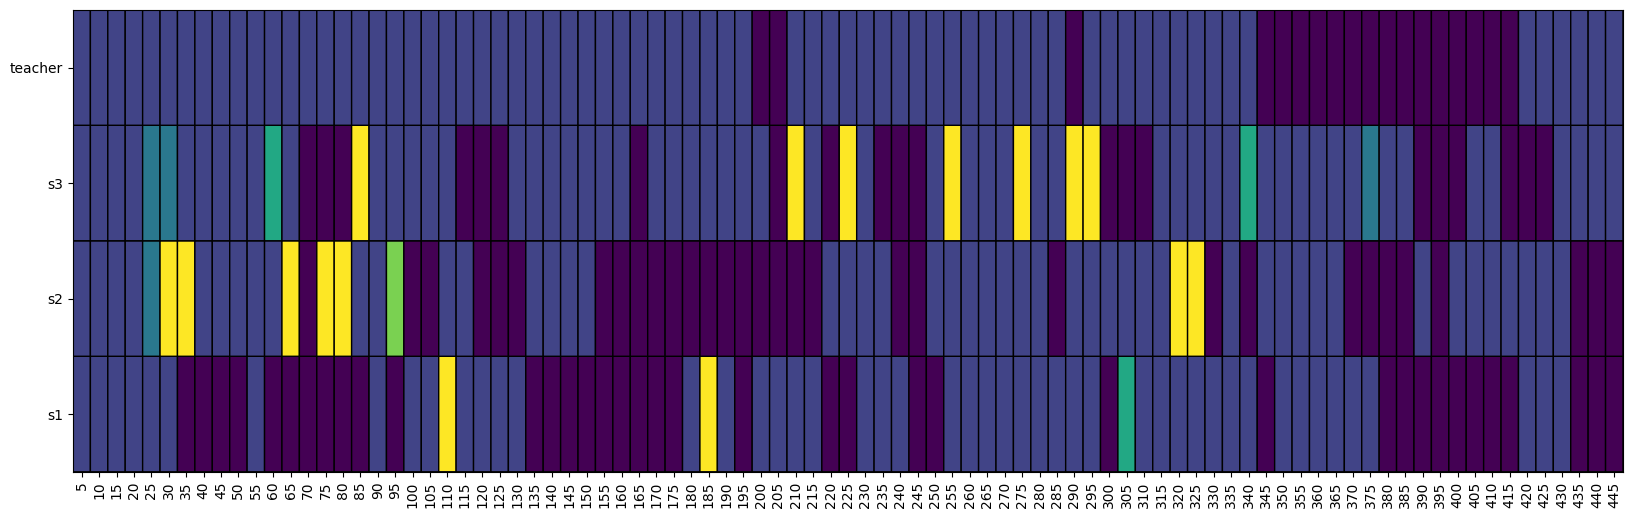

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data, this would actually be your input data.
# data = {
#     'timestamp': [5, 10, 15, 20, 25, 30, 35, 40, 45],
#     'rose': ['display', '', 'display', 'display', 'display', 'display', 'display', 'display', 'display'],
#     'DaPaw': ['', 'S7', '', '', '', '', '', '', 'S7'],
#     'SJ 3747': ['', 'rose', '', '', '', '', '', '', ''],
#     'Taylow Swift': ['display', '', '', '', '', '', '', '', ''],
#     # ... include other columns ...
# }

# Convert the dictionary to a pandas DataFrame
# df = pd.DataFrame(data)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(20, 6))

# Remove timestamp from data to plot and transpose the DataFrame
plot_data = df.drop('timestamp', axis=1).T

# Create a dictionary to convert display values to numbers for coloring
value_to_number = {value: i for i, value in enumerate(np.unique(plot_data.values))}

# Convert all the display values to numbers using the dictionary
num_data = plot_data.replace(value_to_number)

# Create the color
cmap = plt.cm.get_cmap('Pastel1', len(value_to_number))
colors = [cmap(value_to_number[value]) for value in np.unique(plot_data.values)]

# Plot the heatmap
# c = ax.pcolor(num_data, cmap='Set2', edgecolors='k', linewidths=4)
c = ax.pcolor(num_data, facecolor=colors, edgecolor='k', linewidth=1)

# Set the ticks
ax.set_xticks(np.arange(len(df['timestamp'])) + 0.5, minor=False)
ax.set_yticks(np.arange(len(plot_data.index)) + 0.5, minor=False)

# Tick labels
ax.set_xticklabels(df['timestamp'])
ax.set_yticklabels(plot_data.index)

# Rotate the x-tick labels
plt.xticks(rotation=90)

plt.show()


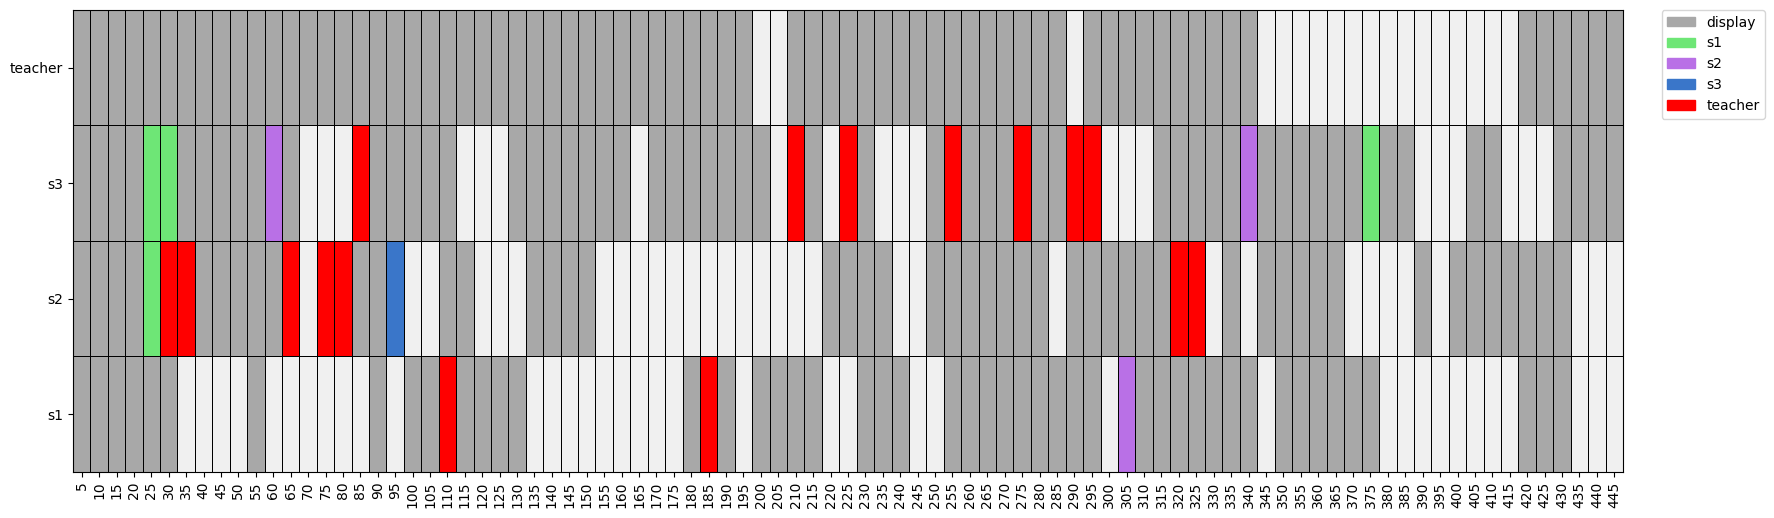

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Sample data
# data = {
#     'timestamp': [5, 10, 15, 20, 25, 30, 35, 40, 45],
#     'rose': ['display', None, 'display', 'display', 'display', 'display', 'display', 'display', 'display'],
#     'DaPaw': [None, 'S7', None, None, None, None, None, None, 'S7'],
#     'SJ 3747': [None, 'rose', None, None, None, None, None, None, None],
#     'Taylow Swift': ['display', None, None, None, None, None, None, None, None],
#     # ... other columns ...
# }

# Convert the dictionary to a pandas DataFrame
# df = pd.DataFrame(data)

# Custom color set
# color_dict = {
#     None: 'white',
#     'display': 'lightblue',
#     'S7': 'lightgreen',
#     'rose': 'salmon',
#     # ... other categories with their colors
# }
# color_dict = {
#     None: 'white',
#     '': 'white',
#     'display': 'lightgray',
#     's1': 'lightblue',
#     's2': 'lightgreen',
#     's3': 'salmon',
#     's4': 'lightcoral',
#     's5': 'lightcyan',
#     's6': 'lightgray',
#     's7': 'lightpink',
#     'teacher': 'red',
#     'r1': 'blue',
#     'r2': 'green',
# }

# color_dict = {
#     'display': 'grey',
#     's1': 'blue',
#     's2': 'green',
#     's3': 'cyan',
#     'teacher': 'red',
#     None: 'white',
#     '': 'white',
# }
color_dict = {
    'display': '#a8a8a8',    # Predominant class
    's1': '#6ee676',         # First game class
    's2': '#b970e6',         # Second game class
    's3': '#3a76c9',         # Third game class
    # 's4': '#decbe4',         # Fourth game class
    'teacher': 'red',        # Keeping red for 'teacher' if still needed
    None: '#f0f0f0',         # Empty cells
    '': '#f0f0f0',           # Also for empty cells
}

# Create a figure and a set of subplots
# fig, ax = plt.subplots(figsize=(20, 10))

# Define the aspect ratio for each cell
cell_height = 1.5 # You can adjust this to make cells taller

# Create a numeric matrix where each unique label is replaced by a unique number
# and transpose the data to get timestamps on the x-axis
plot_data = df.set_index('timestamp').T.applymap(lambda x: {v: k for k, v in enumerate(color_dict.keys())}[x])

# Calculate figure size to make sure each cell has the specified height
fig_width = 20  # Fixed figure width
fig_height = cell_height * len(plot_data.index)  # Dynamic figure height based on number of rows and cell height
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Create the colormap using the custom color set
cmap = ListedColormap(color_dict.values())

# Plot the heatmap
# c = ax.matshow(plot_data, cmap=cmap, edgecolors='black', aspect='auto')
# Use pcolormesh instead of matshow to add edge colors
X, Y = np.meshgrid(np.arange(plot_data.shape[1] + 1), np.arange(plot_data.shape[0] + 1))
c = ax.pcolormesh(X, Y, plot_data, cmap=cmap, edgecolors='black', linewidth=0.5)

# Setting up the ticks
ax.set_xticks(np.arange(len(df['timestamp'])) + 0.5, minor=False)
ax.set_yticks(np.arange(len(plot_data.index)) + 0.5, minor=False)

# Tick labels
ax.set_xticklabels(df['timestamp'])
ax.set_yticklabels(plot_data.index)

# Rotate the x-tick labels
plt.xticks(rotation=90)

# Create a legend with the custom color set
legend_patches = [Patch(color=color, label=label) for label, color in color_dict.items() if (label is not None) and (label != '')]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.025, 1), loc='upper left', borderaxespad=0.)
# plt.legend(handles=legend_patches)

plt.show()


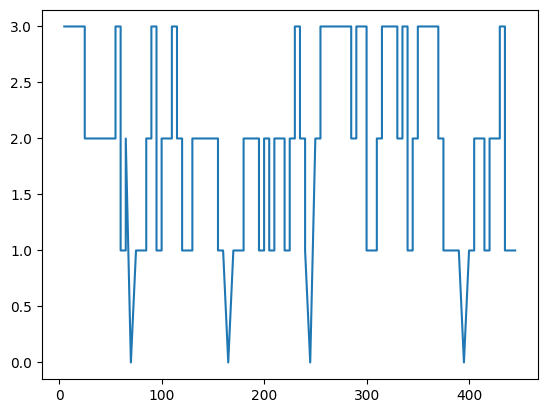

In [5]:
# Compute the joint attention of students
STUDENTS = ['s1', 's2', 's3']

x_list = []
y_list = []
prior_counts = None
prior_timestamp = None

for i, row in df.iterrows():

    items = []
    for s in STUDENTS:
        if row[s] == 'teacher':
            items.append('display')
        elif row[s] != '':
            items.append(row[s])

    items = np.array(items)
    unique, counts = np.unique(items, return_counts=True)

    if len(counts) == 0:
        # if type(prior_counts) != type(None):
        #     y_list.append(prior_timestamp) 
        #     x_list.append(0)

        x_list.append(0)
        y_list.append(row['timestamp'])

        prior_counts = None
    else:
        if type(prior_counts) != type(None):
            y_list.append(row['timestamp']) 
            x_list.append(prior_counts)

        y_list.append(row['timestamp']+0.0001)
        x_list.append(max(counts))

        prior_counts = max(counts)

    prior_timestamp = row['timestamp']

plt.plot(y_list, x_list)
plt.show()


In [4]:
import plotly.graph_objects as go
import networkx as nx
import pandas as pd
from collections import defaultdict

# Sample data
# data = {
#     'observer': ['Alice', 'Bob', 'Alice', 'Charlie', 'Charlie', 'Bob'],
#     'observed': ['Bob', 'Alice', 'Charlie', 'Alice', 'Bob', 'Charlie'],
#     'count': [5, 3, 8, 2, 4, 5]
# }
# df = pd.DataFrame(data)

data = defaultdict(list)
PERSONS = ['s1', 's2', 's3', 'teacher']
for p in PERSONS:
    counts = df[p].value_counts()

    # Append to the data
    for i, c in counts.items():
        if i == '':
            continue
        data['observer'].append(p)
        data['observed'].append(i)
        data['count'].append(min(c, 10))

dff = pd.DataFrame(data)
print(dff)

   observer observed  count
0        s1  display     10
1        s1  teacher      2
2        s1       s2      1
3        s2  display     10
4        s2  teacher      7
5        s2       s1      1
6        s2       s3      1
7        s3  display     10
8        s3  teacher      7
9        s3       s1      3
10       s3       s2      2
11  teacher  display     10


In [7]:

size_factor = 1
node_size_factor = 2

# Create the graph
G = nx.DiGraph()
for _, row in dff.iterrows():
    observer, observed, count = row['observer'], row['observed'], row['count']
    G.add_edge(observer, observed, weight=count)

# Node positions
pos = nx.spring_layout(G)

# Extract node and edge traces
edge_trace = []
node_trace = []
node_size = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    weight = G[edge[0]][edge[1]]['weight']

    # Calculate arrowhead position, adjust endpoint to avoid overlap
    vec = [x1 - x0, y1 - y0]
    vec_length = (vec[0]**2 + vec[1]**2)**0.5
    norm_vec = [vec[0]/vec_length, vec[1]/vec_length]
    offset = 0.025  # Adjust this value based on your needs
    arrow_x1 = x1 - norm_vec[0]*offset
    arrow_y1 = y1 - norm_vec[1]*offset

    edge_trace.append(go.Scatter(
        x=[x0, arrow_x1, None], y=[y0, arrow_y1, None],
        line=dict(width=weight*size_factor, color='grey'), # Adjust line width by weight
        hoverinfo='none',
        mode='lines'))
    

for node in G.nodes():
    x, y = pos[node]

    # Make the size of the node proportional to the weight of its incoming edges
    incoming_edges = G.in_edges(node)
    incoming_edges_weight = max(5, sum([G[edge[0]][edge[1]]['weight'] for edge in incoming_edges]))

    node_trace.append(go.Scatter(
        x=[x], y=[y],
        text=[node],
        mode='markers+text',
        textposition="bottom center",
        hoverinfo='text',
        marker=dict(
            showscale=False,
            color='blue',
            size=node_size_factor*incoming_edges_weight, # Adjust the size multiplier as needed
            line_width=2)))

# Create a figure
fig = go.Figure(data=edge_trace + node_trace,
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

# Add edges as line traces
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    weight = G[edge[0]][edge[1]]['weight']

    # Add an arrowhead as an annotation
    fig.add_annotation(
        x=x1, y=y1,
        ax=x0, ay=y0,
        xref='x', yref='y',
        axref='x', ayref='y',
        showarrow=True,
        arrowhead=3,  # Arrow style, change this value to get different arrow types
        arrowsize=1,  # Arrow size, adjust as needed
        arrowwidth=weight*0.5,  # Arrow width, scaled by weight
        arrowcolor='grey'
    )

fig.show()

# Save figure as a png
fig.write_image("network_graph.png")


/tmp/ipykernel_485801/3873017160.py:61: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, ax=ax1, edgelist=[(start, end)], width=edge_width, arrowsize=edge_width*edge_size_factor,


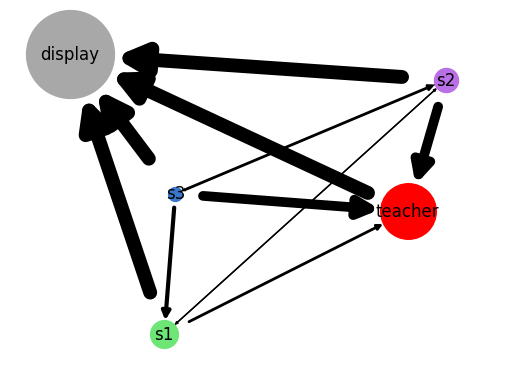

In [37]:
import matplotlib.pyplot as plt
import networkx as nx

# # Create a directed graph
# G = nx.DiGraph()

# # Add nodes with weight property (you can change these values)
# G.add_node('A', weight=10)
# G.add_node('B', weight=3)
# G.add_node('C', weight=10)

# # Add edges with weight property (you can change these values)
# G.add_edge('A', 'B', weight=1)
# G.add_edge('B', 'C', weight=2)
# G.add_edge('A', 'C', weight=3)


color_dict = {
    'display': '#a8a8a8',    # Predominant class
    's1': '#6ee676',         # First game class
    's2': '#b970e6',         # Second game class
    's3': '#3a76c9',         # Third game class
    'teacher': 'red',        # Keeping red for 'teacher' if still needed
}

# Constants
node_size_factor = 100
edge_size_factor = 4
low_value = 1

# Create the graph
G = nx.DiGraph()
for _, row in dff.iterrows():
    observer, observed, count = row['observer'], row['observed'], row['count']
    G.add_edge(observer, observed, weight=count)

for node in G.nodes():
    # Make the size of the node proportional to the weight of its incoming edges
    incoming_edges = G.in_edges(node)
    incoming_edges_weight = max(low_value, sum([G[edge[0]][edge[1]]['weight'] for edge in incoming_edges]))
    G.nodes[node]['weight'] = incoming_edges_weight

# Generate positions for each node
pos = nx.spring_layout(G)

ax1 = plt.subplot(111)
ax1.margins(0.1)

# Draw nodes
for node, (x, y) in pos.items():

    # Get the color
    color = color_dict[node]

    nx.draw_networkx_nodes(G, pos, ax=ax1, nodelist=[node], node_size=G.nodes[node]['weight']*node_size_factor, node_color=color)
    # plt.text(x, y, s=node, horizontalalignment='center', fontsize=12, color='white', weight='bold')

# Draw edges with arrowheads
for (start, end) in G.edges():
    edge_width = G.edges[start, end]['weight']
    nx.draw_networkx_edges(G, pos, ax=ax1, edgelist=[(start, end)], width=edge_width, arrowsize=edge_width*edge_size_factor, 
                           node_size=G.nodes[end]['weight']*node_size_factor, arrowstyle='-|>', 
                           connectionstyle='arc3')

# Draw node labels
nx.draw_networkx_labels(G, pos, ax=ax1, font_size=12, font_color='black')

# Remove axes
plt.axis('off')

# Show plot
# plt.show()
plt.savefig("network_graph.png", dpi=400)
